In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy
import inspect
import time
import warnings



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/project/train_data.csv"
data_train = pd.read_csv(path).set_index("Date")

In [ ]:
path="/content/drive/MyDrive/project/test_data.csv"
data_test = pd.read_csv(path).set_index("Date")

In [ ]:
data_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10477.549805,10495.200195,10404.650391,10442.200195,10442.200195,153400.0
2018-01-03,10482.650391,10503.599609,10429.549805,10443.200195,10443.200195,167300.0
2018-01-04,10469.400391,10513.000000,10441.450195,10504.799805,10504.799805,174900.0
2018-01-05,10534.250000,10566.099609,10520.099609,10558.849609,10558.849609,180900.0
2018-01-08,10591.700195,10631.200195,10588.549805,10623.599609,10623.599609,169000.0


In [ ]:
data_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,18131.699219,18215.150391,18086.500000,18197.449219,18197.449219,256100
2023-01-03,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700
2023-01-04,18230.650391,18243.000000,18020.599609,18042.949219,18042.949219,235200
2023-01-05,18101.949219,18120.300781,17892.599609,17992.150391,17992.150391,269900
2023-01-06,18008.050781,18047.400391,17795.550781,17859.449219,17859.449219,238200


In [ ]:
 y = data_train['Close'].fillna(method="ffill")

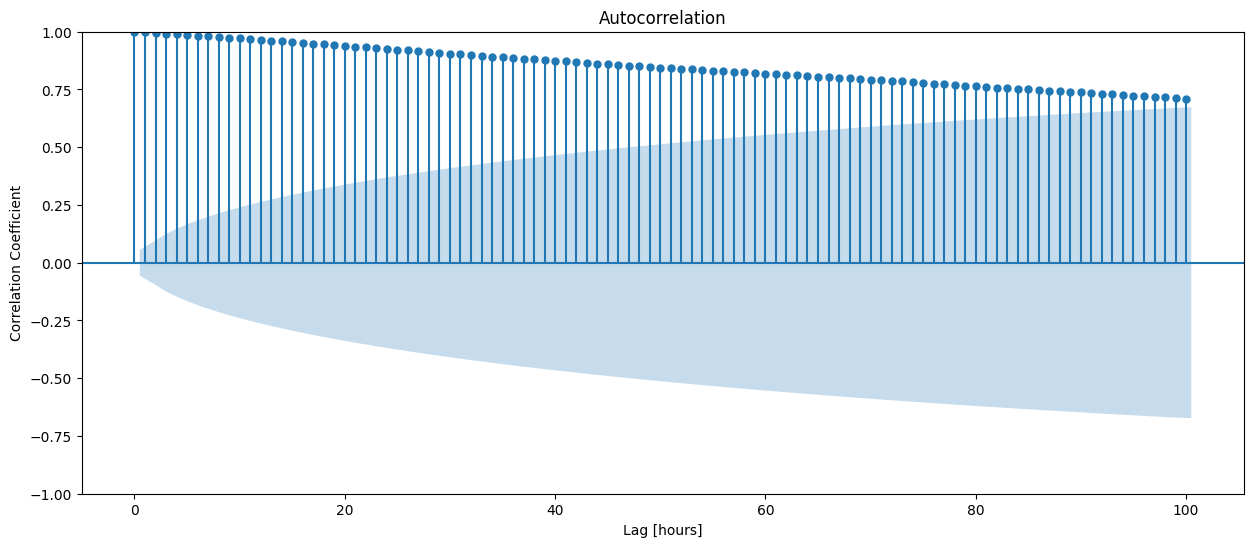

In [ ]:
fig,ax =plt.subplots(figsize=(15,6))
plot_acf(y,ax,lags=100)
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


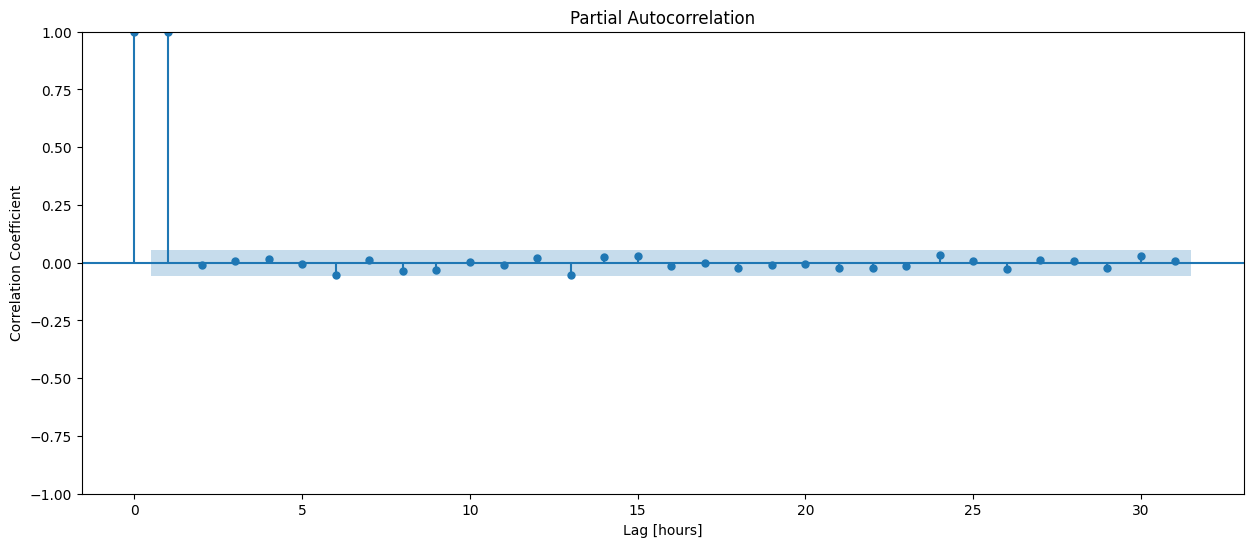

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
plot_pacf(y,ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

In [ ]:
p_params = range(0,40,8)
q_params = range(0,5,1)

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
for p in p_params:
    for q in q_params:
        order = (p,0,q);
        start_time = time.time();
        model = ARIMA(y, order= order).fit();
        elapsed_time = round(time.time()-start_time,2);
        print(f"Trained Arima model {order} and time {elapsed_time} seconds")
        y_pred = model.predict();
        mae = mean_absolute_error(y,y_pred);
        print(mae)

Trained Arima model (0, 0, 0) and time 0.09 seconds
2663.0184996311923
Trained Arima model (0, 0, 1) and time 1.46 seconds
1357.4687091210997
Trained Arima model (0, 0, 2) and time 2.28 seconds
776.9517167900452
Trained Arima model (0, 0, 3) and time 2.4 seconds
568.9117097725622
Trained Arima model (0, 0, 4) and time 4.66 seconds
411.46219225784426
Trained Arima model (8, 0, 0) and time 1.78 seconds
107.1089867276786
Trained Arima model (8, 0, 1) and time 3.4 seconds
107.09465550207752
Trained Arima model (8, 0, 2) and time 3.16 seconds
107.1636486199305
Trained Arima model (8, 0, 3) and time 4.08 seconds
107.14372020497056
Trained Arima model (8, 0, 4) and time 9.23 seconds
107.17200479460725
Trained Arima model (16, 0, 0) and time 3.91 seconds
107.16257760900152
Trained Arima model (16, 0, 1) and time 9.31 seconds
107.17146386616149
Trained Arima model (16, 0, 2) and time 18.84 seconds
107.15260192754262
Trained Arima model (16, 0, 3) and time 22.59 seconds
107.15734118712597
Traine

In [ ]:
p = 8
q = 1

In [ ]:
order

(8, 0, 1)

In [ ]:
order = (8,0,1)
model = ARIMA(y, order= order).fit();

In [ ]:
y_pred = model.predict();

In [ ]:
model.resid

Date
2018-01-02   -2889.681934
2018-01-03      -2.911180
2018-01-04      57.688725
2018-01-05      50.180776
2018-01-08      60.696390
                 ...     
2022-12-26     197.062375
2022-12-27     150.053754
2022-12-28       1.856522
2022-12-29      86.468733
2022-12-30     -44.770849
Length: 1235, dtype: float64

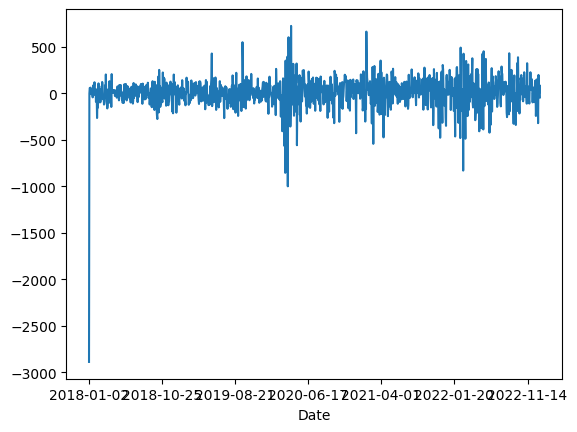

In [ ]:
model.resid.plot();

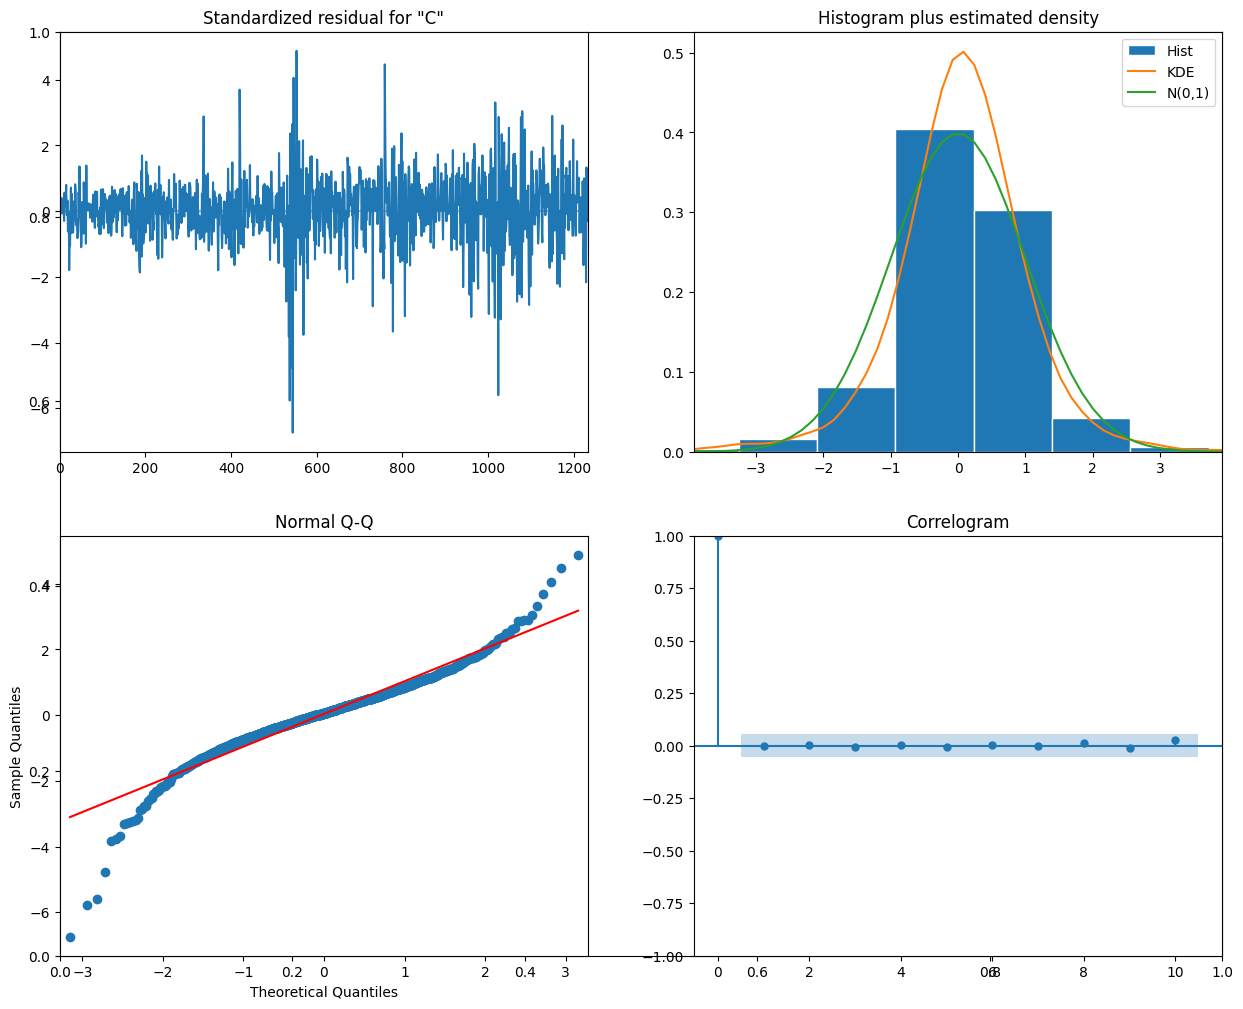

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig);

In [ ]:
df_predictions = pd.DataFrame({"y_test":y,"y_pred_wfv":y_pred},index=y.index)
fig = px.line(df_predictions,labels={"Dates":"Nifty 50"})
fig.show()

In [ ]:
# walk forward validation for testing the data
y_test = data_test['Close'].fillna(method="ffill")



In [ ]:
y_test

Date
2023-01-02    18197.449219
2023-01-03    18232.550781
2023-01-04    18042.949219
2023-01-05    17992.150391
2023-01-06    17859.449219
                  ...     
2023-06-20    18816.699219
2023-06-21    18856.849609
2023-06-22    18771.250000
2023-06-23    18665.500000
2023-06-26    18691.199219
Name: Close, Length: 119, dtype: float64

In [ ]:
y_pred_wfv = pd.Series()
history = y.copy()
for i in range(len(y_test)):
    model = ARIMA(history,order=(8,0,1)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index - len(y)])

In [ ]:
test_mae = mean_absolute_error(y_test,y_pred_wfv)
test_mae

91.76571410052865

In [ ]:
len(y_test)

119

In [ ]:
y_test

Date
2023-01-02    18197.449219
2023-01-03    18232.550781
2023-01-04    18042.949219
2023-01-05    17992.150391
2023-01-06    17859.449219
                  ...     
2023-06-20    18816.699219
2023-06-21    18856.849609
2023-06-22    18771.250000
2023-06-23    18665.500000
2023-06-26    18691.199219
Name: Close, Length: 119, dtype: float64

In [ ]:
len(y_pred_wfv)

119

In [ ]:
y_pred_wfv

1235    18146.096451
1236    18173.269673
1237    18229.608460
1238    18042.297808
1239    17970.510074
            ...     
1349    18758.886580
1350    18801.283415
1351    18853.081342
1352    18780.895569
1353    18638.108884
Length: 119, dtype: float64

In [ ]:
y_pred_wfv.index = y_test.index

In [ ]:
df_predictions = pd.DataFrame({"y_test":y_test,"y_pred_wfv":y_pred_wfv},index=y_test.index)
fig = px.line(df_predictions,labels={"Nifty 50":"Date"})

fig.show()